In [1]:
import MySQLdb
db = MySQLdb.connect("localhost", "root", "root", "house")
db.set_character_set('utf8')
cursor = db.cursor()
sql = "select link from link_list where status = 1 limit 1"
cursor.execute(sql)
results = cursor.fetchall()
print results

(('http://bj.lianjia.com/chengjiao/p1a1l1sf1lc1f1pg1',),)


昌平与西城是否满5的分布

In [3]:
SQL = "select region, five, count(*)  \
      from ods_house_da where region = 'BJXC' or region ='BJCP' group by region, five"
cursor.execute(SQL)
results = cursor.fetchall()
print "地区\t类型\t数量"
for i in results:
    if i[0] == 'BJCP':
        print '昌平\t',
    else:
        print '西城\t',
    if i[1] == 0:
        print '不满五\t',
    else:
        print '满五\t',
    print i[2]

地区	类型	数量
昌平	不满五	2531
昌平	满五	2271
西城	不满五	2337
西城	满五	4243


In [4]:
西城与昌平的均价差别

SyntaxError: invalid syntax (<ipython-input-4-e709e0b37dde>, line 1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


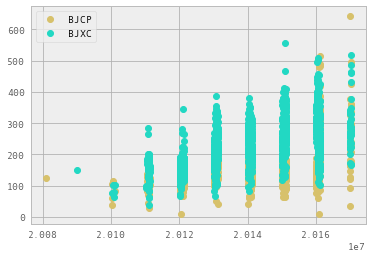

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipykernel
import jupyter_client

SQL = "select replace(dealDate,'.',''), region, avg(totalPrice), avg(totalPrice/square) from ods_house_da where region = 'BJXC' or region = 'BJCP' group by dealDate, region;"
cursor.execute(SQL);
rows = cursor.fetchall()
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df.rename(columns={0: 'date', 1: 'region', 2: 'price', 3: 'pricePerA'}, inplace=True)
#df.plot()
groups = df.groupby('region')

# Plot
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

fig, ax = plt.subplots()
ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.date, group.price, marker='.', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()

In [6]:
SQL = "select region, five, struct, avg(totalPrice), avg(totalPrice/square)  \
      from ods_house_da where region = 'BJXC' or region ='BJCP' group by region,struct, five"
cursor.execute(SQL)
results = cursor.fetchall()
print "地区\t类型\t格局\t均总价\t均单价"
for i in results:
    if i[0] == 'BJCP':
        print '昌平\t',
    else:
        print '西城\t',
    if i[1] == 0:
        print '不满五\t',
    else:
        print '满五\t',
    print i[2] + '\t' + str(round(i[3],2)) + '\t' + str(round(i[4],2))

地区	类型	格局	均总价	均单价
昌平	不满五	1室0厅	129.94	2.97
昌平	满五	1室0厅	154.95	3.61
昌平	不满五	1室1厅	155.68	2.77
昌平	满五	1室1厅	172.35	3.01
昌平	不满五	1室2厅	159.0	2.71
昌平	满五	1室2厅	190.29	3.05
昌平	不满五	2室0厅	134.91	2.69
昌平	满五	2室0厅	135.14	2.52
昌平	不满五	2室1厅	175.4	2.88
昌平	满五	2室1厅	168.43	2.73
昌平	不满五	2室2厅	180.2	3.52
昌平	满五	2室2厅	189.86	2.82
昌平	不满五	3室0厅	84.5	1.5
昌平	满五	3室0厅	134.5	2.5
昌平	不满五	3室1厅	206.09	3.49
昌平	满五	3室1厅	167.56	2.55
昌平	不满五	3室2厅	117.33	1.95
昌平	满五	3室2厅	83.5	1.56
西城	不满五	1室0厅	173.61	5.25
西城	满五	1室0厅	201.98	5.61
西城	不满五	1室1厅	214.96	5.28
西城	满五	1室1厅	255.37	6.16
西城	不满五	1室2厅	156.8	2.89
西城	满五	1室2厅	186.88	3.59
西城	不满五	2室0厅	236.25	5.92
西城	满五	2室0厅	285.6	6.32
西城	不满五	2室1厅	215.75	4.44
西城	满五	2室1厅	249.74	5.1
西城	不满五	2室2厅	193.0	4.86
西城	满五	2室2厅	266.0	5.31
西城	不满五	3室0厅	189.0	3.25
西城	满五	3室0厅	262.5	4.76
西城	不满五	3室1厅	178.64	3.22
西城	满五	3室1厅	190.15	3.49


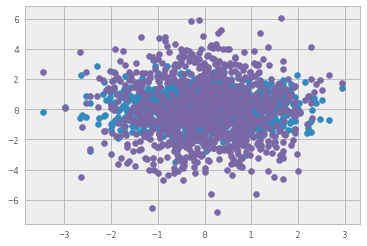

In [7]:
from pylab import *

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
Z = np.random.normal(0,2,n)
scatter(X,Y)
scatter(X,Z)
show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


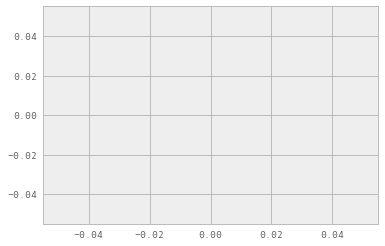

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipykernel
import jupyter_client

SQL = "select replace(dealDate,'.',''), region, avg(totalPrice), avg(totalPrice/square) from ods_house_da where region = 'BJXC' or region = 'BJCP' group by dealDate, region;"
cursor.execute(SQL);
rows = cursor.fetchall()
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df.rename(columns={0: 'date', 1: 'region', 2: 'price', 3: 'pricePerA'}, inplace=True)
#df.plot()
groups = df.groupby('region')

# Plot
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

fig, ax = plt.subplots()
ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    pass
    #ax.scatter(group.date, group.price, label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()